In [1]:
import numpy as np
import pandas as pd
import os
import time
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

In [14]:
counts_path = "data\single_files"

In [20]:
# Read dataset with open roads
df_array = []
initial_seed = 1990
day_to_simulate = 365
for seed in range(initial_seed, initial_seed + day_to_simulate):
    file_path = os.path.join(counts_path, "nrw",  f"count_dataset_no_roadworks_{seed}.csv")
    df = pd.read_csv(file_path, sep=",", header=0, index_col=0).sort_index(axis=1)    
    df_array.append(df)
    # print(df_array[-1].shape)
no_roadworks = pd.concat(df_array, ignore_index=True, sort=False)

# Read dataset with closed roads
df_array = []
for seed in range(initial_seed, initial_seed + day_to_simulate):
    file_path = os.path.join(counts_path, "wrw", f"count_dataset_w_roadworks_{seed}.csv")
    df = pd.read_csv(file_path, sep=",", header=0, index_col=0).sort_index(axis=1)    
    df_array.append(df)
    # print(df_array[-1].shape)
w_roadworks = pd.concat(df_array, ignore_index=True, sort=False)

In [23]:
df_array[1].head()

-1007378731_0  -1008205955#2_0  -1008690137_0  -1028388888_0  \
ts_sumo                                                                 
0.0                  0                0              0              0   
900.0                0                0              1              1   
1800.0               3                1              0              1   
2700.0               0                0              0              3   
3600.0               1                0              0              0   

         -1030737731_0  -10503253_0  -1064675851#1_0  -1064675851#4_0  \
ts_sumo                                                                 
0.0                  0            0                0                0   
900.0                1            3                0                0   
1800.0               3            1                0                0   
2700.0               2            2                0                0   
3600.0               1            0                0                0   

         -1077825730_0  -1089069632_0  ...  E32_0  E34_0  E35_0  E36_0  E38_0  \
ts_sumo                                ...                                      
0.0                  0              2  ...      0      0      0      4      2   
900.0                2              5  ...      1      1      0      1      1   
1800.0               1              8  ...      0      1      1      2      3   
2700.0               2              6  ...      2      2      0      0      0   
3600.0               3              7  ...      2      3      1      2      1   

         E40_0  E41_0  E4_0  E5_0  E7_0  
ts_sumo                                  
0.0          2      0     1     1     0  
900.0        1      0     0     0     1  
1800.0       3      0     1     1     2  
2700.0       0      0     1     1     0  
3600.0       1      0     0     0     3  

[5 rows x 1937 columns]

In [24]:
df_array[2].head()

-1007378731_0  -1008205955#2_0  -1008690137_0  -1028388888_0  \
ts_sumo                                                                 
0.0                  1                0              0              0   
900.0                0                0              0              0   
1800.0               0                0              0              0   
2700.0               0                0              0              0   
3600.0               0                0              0              0   

         -1030737731_0  -10503253_0  -1064675851#1_0  -1064675851#4_0  \
ts_sumo                                                                 
0.0                  1            0                0                0   
900.0                1            1                0                0   
1800.0               0            1                0                0   
2700.0               0            0                0                0   
3600.0               0            2                1                0   

         -1077825730_0  -1089069632_0  ...  E32_0  E34_0  E35_0  E36_0  E38_0  \
ts_sumo                                ...                                      
0.0                  0              1  ...      1      1      0      0      0   
900.0                1              2  ...      1      1      0      0      0   
1800.0               0              0  ...      0      0      0      1      1   
2700.0               1              2  ...      0      0      0      1      1   
3600.0               0              3  ...      0      1      0      0      0   

         E40_0  E41_0  E4_0  E5_0  E7_0  
ts_sumo                                  
0.0          0      0     0     0     0  
900.0        0      0     0     0     0  
1800.0       1      0     0     0     1  
2700.0       1      0     0     0     0  
3600.0       0      0     0     0     1  

[5 rows x 1937 columns]

In [25]:
detector_ids = np.asarray(df_array[0].columns)

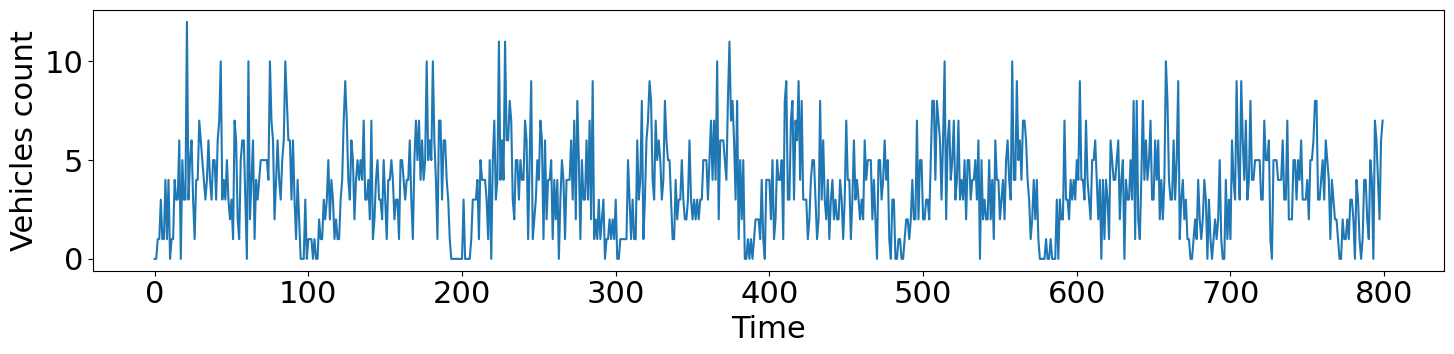

In [26]:
end_time = 800 # to plot
x_axis_label = [time.strftime('D%d %H:%M:%S %p', time.gmtime(t*900)) for t in range(end_time)]

plt.figure(figsize=(15, 4))
plt.plot(no_roadworks.values[:end_time, 0], label="no road works")
plt.ylabel("Vehicles count")
plt.xlabel("Time")
plt.tight_layout()

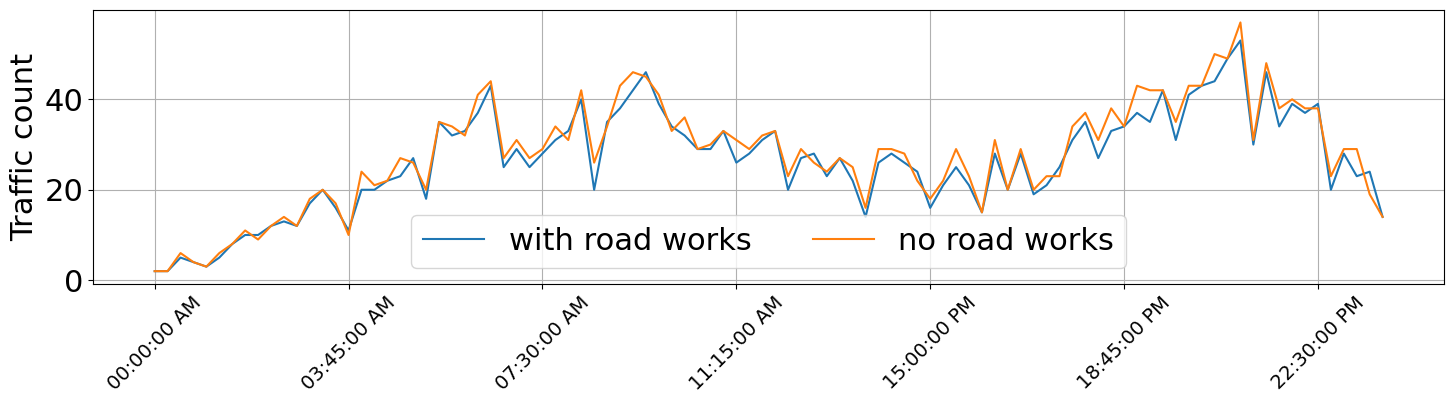

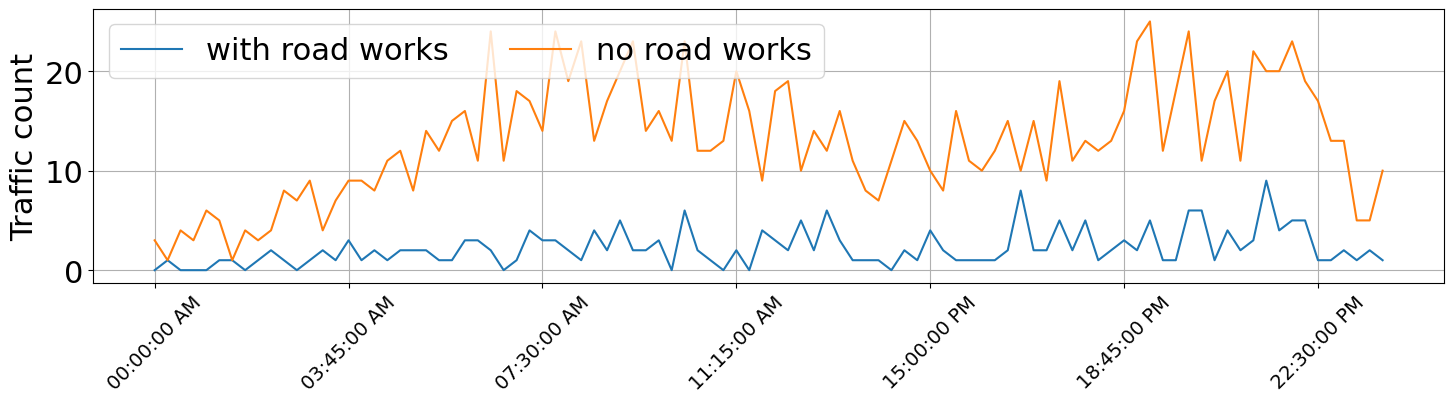

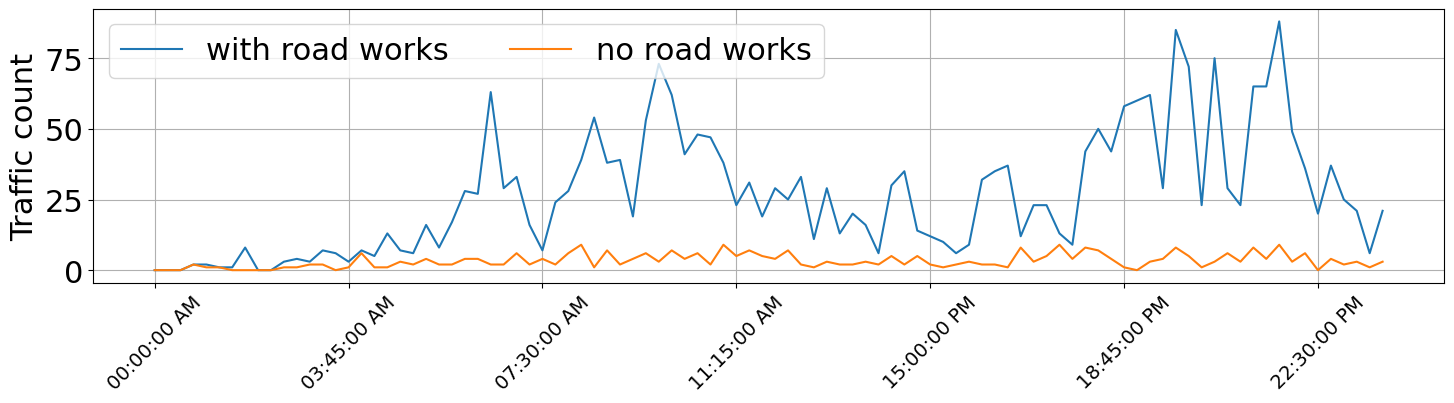

In [28]:
end_time = 96 # to plot
x_axis_label = [time.strftime('%H:%M:%S %p', time.gmtime(t*900)) for t in range(end_time)]

fig, ax = plt.subplots(figsize=(15, 4.5), facecolor='white')
ax.plot(x_axis_label, w_roadworks.values[:end_time, 9], label="with road works")
ax.plot(x_axis_label, no_roadworks.values[:end_time, 9], label="no road works")
plt.ylabel("Traffic count")
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(fontsize=14)
ax.grid(True)
plt.xticks(rotation=45)
# plt.title("The road works INCREASE the vehicles passing by this sensor")
plt.legend(ncol=2)
plt.tight_layout()

fig, ax = plt.subplots(figsize=(15, 4.5), facecolor='white')
plt.plot(x_axis_label, w_roadworks.values[:end_time, 1], label="with road works")
plt.plot(x_axis_label, no_roadworks.values[:end_time, 1], label="no road works")
plt.ylabel("Traffic count")
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(fontsize=14)
ax.grid(True)
plt.xticks(rotation=45)
# plt.title("The road works INCREASE the vehicles passing by this sensor")
plt.legend(ncol=2)
plt.tight_layout()

fig, ax = plt.subplots(figsize=(15, 4.5), facecolor='white')
plt.plot(x_axis_label, w_roadworks.values[:end_time, 3], label="with road works")
plt.plot(x_axis_label, no_roadworks.values[:end_time, 3], label="no road works")
plt.ylabel("Traffic count")
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(fontsize=14)
ax.grid(True)
plt.xticks(rotation=45)
# plt.title("The road works INCREASE the vehicles passing by this sensor")
plt.legend(ncol=2)
plt.tight_layout()

In [29]:
# get the detectors, for each dataset, that didn't record any data
detectors_without_data_wrw = [detector for detector, max_value in w_roadworks.max().items() if max_value ==0]
detectors_without_data_norw = [detector for detector, max_value in no_roadworks.max().items() if max_value ==0]

print(f'Empty detectors in simulation with roadworks:', len(detectors_without_data_wrw))
print(f'Empty detectors in simulation without roadworks:', len(detectors_without_data_norw))

# join the two detectors sets, and remove duplicates
detectors_without_data = np.unique(np.concatenate((detectors_without_data_wrw, detectors_without_data_norw)))
print("Detectors without data:", len(detectors_without_data))

print(f'Detectors with data:', no_roadworks.shape[1] - len(detectors_without_data))

Empty detectors in simulation with roadworks: 44
Empty detectors in simulation without roadworks: 36
Detectors without data: 45
Detectors with data: 1892


In [30]:
detectors_without_data

array(['-12830001#2_0', '-138166185_0', '-150275992_0', '-256149369#1_0',
       '-256165068#1_0', '-30639588_0', '-308337955#2_0', '-31427260_0',
       '-32519928_0', '-33739373_0', '-37346632_0', '-40742591#11_0',
       '-416562591_0', '-477054035#2_0', '-48316286_0', '-555922918_0',
       '-625312720_0', '-679905623#2_0', '112368849#4_0', '1191707200_0',
       '1210304380_0', '1210304380_1', '128872477#0_0', '137238867#0_0',
       '14348564#0_0', '174272151_0', '214162885_0', '23580581#5_0',
       '243570320#0_0', '25009765_0', '265103232_0', '31538312_0',
       '40416191_0', '40416191_1', '40742591#0_0', '412429149_0',
       '412429149_1', '41699234_0', '4306846#0_0', '512351963_0',
       '641806158#0_0', '8154787#0_0', '8154787#0_1', '893314848#0_0',
       'E15.4_0'], dtype='<U14')

In [31]:
# Remove empty detectors
w_roadworks = w_roadworks.drop(detectors_without_data, axis=1)
no_roadworks = no_roadworks.drop(detectors_without_data, axis=1)
detectors_id_with_data = np.setdiff1d(detector_ids, np.asarray(detectors_without_data))

In [32]:
len(detectors_id_with_data)

1892

In [33]:
# Save the detectors with data to extract the graph from sumo
df_detectors = pd.DataFrame(list(detectors_id_with_data))
df_detectors.to_csv("output/Brussels_365d_detector_names.csv", index=None, header=None)

w_roadworks.to_csv("output/Brussels_365d_counts_wrw.csv", index=None)
no_roadworks.to_csv("output/Brussels_365d_counts_nrw.csv", index=None)

In [34]:
# Check the difference of the counts
diff_counts = w_roadworks - no_roadworks

C:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


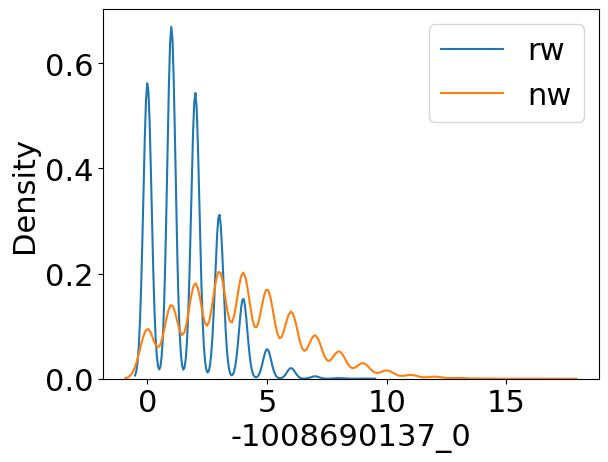

In [38]:
import seaborn as sns
to_plot = 2

sns.kdeplot(w_roadworks.iloc[:, to_plot], label="rw")
sns.kdeplot(no_roadworks.iloc[:, to_plot], label="nw")
plt.legend()

In [39]:
import sumolib
import random
from textwrap import wrap
net = sumolib.net.readNet(os.path.join("data", "bxl_subpart.net1.xml"))

In [40]:

df_difference_location = pd.DataFrame(np.mean(diff_counts, axis=0), columns=["DIFF"])
df_difference_location["lon"] = np.NaN
df_difference_location["lat"] = np.NaN

scaler = MinMaxScaler(feature_range=(-1, 1))

df_difference_location["DIFF"] = scaler.fit_transform(df_difference_location["DIFF"].to_numpy().reshape(-1, 1))

for id_location in df_difference_location.index:
    
    lane_pos =  random.uniform(0, net.getLane(id_location).getLength())
    x, y = sumolib.geomhelper.positionAtShapeOffset(net.getLane(id_location).getShape(), lane_pos)
    lon, lat = net.convertXY2LonLat(x, y)

    df_difference_location.loc[id_location, "lon"] = x
    df_difference_location.loc[id_location, "lat"] = y
    

In [41]:
df_difference_location.head()

DIFF          lon          lat
-1007378731_0   -0.001524  3958.756618  7303.612954
-1008205955#2_0 -0.116112  7225.752541  5656.621302
-1008690137_0   -0.026482  7981.869467  4955.081826
-1028388888_0    0.237875  3389.949035  2915.250437
-1030737731_0   -0.007839  7471.256856  6552.879834

In [43]:
import sumolib  # noqa
from sumolib.visualization import helpers  # noqa

In [44]:
ap = sumolib.options.ArgumentParser()
ap.add_option("-n", "--net", dest="net", metavar="FILE", required=True, type=ap.net_file,
              help="Defines the network to read")
ap.add_option("-i", "--dump-inputs", dest="dumps", metavar="FILE", required=True, type=ap.edgedata_file,
              help="Defines the dump-output files to use as input")
ap.add_option("-m", "--measures", dest="measures",
              default="speed,entered", help="Define which measure to plot")
ap.add_option("--min-width", dest="minWidth", type=float, default=.5,
              help="Defines the minimum edge width")
ap.add_option("--max-width", dest="maxWidth",
              type=float, default=3, help="Defines the maximum edge width")
ap.add_option("--log-colors", dest="logColors", action="store_true",
              default=False, help="If set, colors are log-scaled")
ap.add_option("--log-widths", dest="logWidths", action="store_true",
              default=False, help="If set, widths are log-scaled")
ap.add_option("--min-color-value", dest="colorMin",
              type=float, default=None,
              help="If set, defines the minimum edge color value")
ap.add_option("--max-color-value", dest="colorMax",
              type=float, default=None,
              help="If set, defines the maximum edge color value")
ap.add_option("--min-width-value", dest="widthMin",
              type=float, default=None,
              help="If set, defines the minimum edge width value")
ap.add_option("--max-width-value", dest="widthMax",
              type=float, default=None,
              help="If set, defines the maximum edge width value")
ap.add_option("-v", "--verbose", dest="verbose", action="store_true",
              default=False,
              help="If set, the script says what it's doing")
ap.add_option("--color-bar-label", dest="colorBarLabel", default="",
              help="The label to put on the color bar")
ap.add_option("--internal", action="store_true",
              default=False, help="include internal edges in generated shapes")
helpers.addInteractionOptions(ap)
helpers.addPlotOptions(ap)
helpers.addNetOptions(ap)

# # parse
args = "-v -n bs.net.xml  --measures entered,entered  -i base-jr.xml,base-jr.xml \
  --min-color-value -1000 --max-color-value 1000 --max-width-value 1000 --min-width-value -1000  \
 --max-width 3 --min-width .5 "
options = ap.parse_args(args=args.split())


In [45]:
options.defaultColor = "#606060"
options.defaultWidth = 1
options.xticks = [7000,14001,2000,16]
options.yticks = [9000,16001,1000,16]
options.xlim = [7000,14000]
options.ylim = [9000,16000]
options.size = "8, 6"


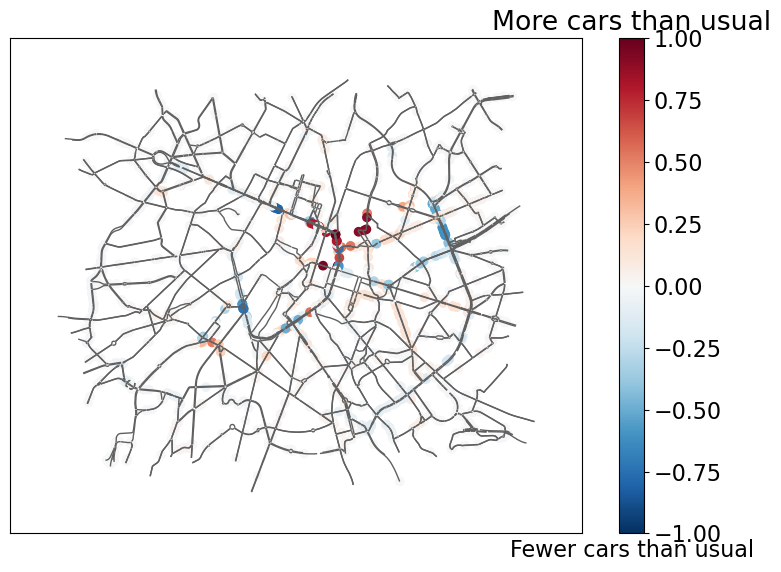

In [46]:
plt.rcParams.update({'font.size': 16})

fig, ax = helpers.openFigure(options)
ax.set_aspect("equal", None, 'C')
helpers.plotNet(net, [], [],  options)
ax = plt.scatter(data=df_difference_location, x="lon", y="lat", c="DIFF", cmap=plt.colormaps.get_cmap('RdBu_r'))

plt.colorbar(ax)

frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

plt.gcf().axes     # [<Axes: >, <Axes: label='<colorbar>'>]
plt.gcf().axes[1].set(title='More cars than usual', xlabel='Fewer cars than usual', ylabel='')
plt.tight_layout()